# COMP30760 ASSIGNMENT 2 - TASK 2 - 18439746 - Matthew O'Donnell
In this assignment we will collect stock price data from four HTML pages (Apple, Facebook, Intel, Microsoft). This notebook covers Task 2 - **Time Series Analysis**

In [243]:
import requests
import pandas as pd
from datetime import datetime
from pandas import read_html
import html5lib
from pathlib import Path
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline
from IPython.display import display_html
from itertools import chain,cycle
import numpy as np
import math
import calendar

Some of the key settings, including our stock urls, file names and codes and also a dictionary we will use to store the dataframes obtained from each url

In [244]:
stock_names = ["Apple", "Facebook", "Intel Corporation", "Microsoft Corporation"]
stock_codes = {"Apple":"AAPL", "Facebook":"FB","Intel Corporation":"INTC", "Microsoft Corporation":"MSFT"}
stock_urls = {"Apple":"http://mlg.ucd.ie/modules/COMP30760/stocks/data-aapl.html", 
              "Facebook":"http://mlg.ucd.ie/modules/COMP30760/stocks/data-fb.html",
              "Intel Corporation":"http://mlg.ucd.ie/modules/COMP30760/stocks/data-intc.html", 
              "Microsoft Corporation":"http://mlg.ucd.ie/modules/COMP30760/stocks/data-msft.html"}
df_companies = {}
url = "/Users/matth/Documents/"

## Data Loading/Preprocessing
Before we can analyse our time series data, we need to transform it into a usable format

In [245]:
for stock_name in stock_names:
    df = pd.read_csv(url + stock_name + "stocks.csv", parse_dates=['Date'])
    df_companies.update({stock_name: df})
    df_companies[stock_name].set_index('Date', inplace=True) 

### Data Verification
Check the format of one of our newly created Stock Data Frames

In [246]:
df_companies["Apple"].head(11)

,Stock,Open,High,Low,Close
Date,,,,,
2019-10-01,AAPL,56.270,57.060,56.050,56.15
2019-10-02,AAPL,55.760,55.900,54.480,54.74
2019-10-03,AAPL,54.610,55.240,53.780,55.21
2019-10-04,AAPL,56.410,56.870,55.970,56.75
2019-10-05,AAPL,55.510,56.055,54.875,55.98
2019-10-06,AAPL,56.515,57.245,56.270,56.43
2019-10-07,AAPL,56.570,57.480,56.460,56.76
2019-10-08,AAPL,56.460,57.010,56.080,56.10
2019-10-09,AAPL,56.760,56.950,56.410,56.76


Check the number of rows and date ranges in our time series

In [247]:
def summarize_dates():
    rows = []
    for stock_name in stock_names:
        row = {"Stock": stock_name}
        row["Rows"] = len(df_companies[stock_name])
        row["DateStart"] = df_companies[stock_name].index.min()
        row["DateEnd"] = df_companies[stock_name].index.max()
        rows.append(row)
    return pd.DataFrame(rows).set_index("Stock")

df_date_ranges = summarize_dates()
df_date_ranges

,Rows,DateStart,DateEnd
Stock,,,
Apple,731,2019-10-01,2021-09-30
Facebook,731,2019-10-01,2021-09-30
Intel Corporation,731,2019-10-01,2021-09-30
Microsoft Corporation,731,2019-10-01,2021-09-30


# Time Series Analysis

## Apple Stocks 

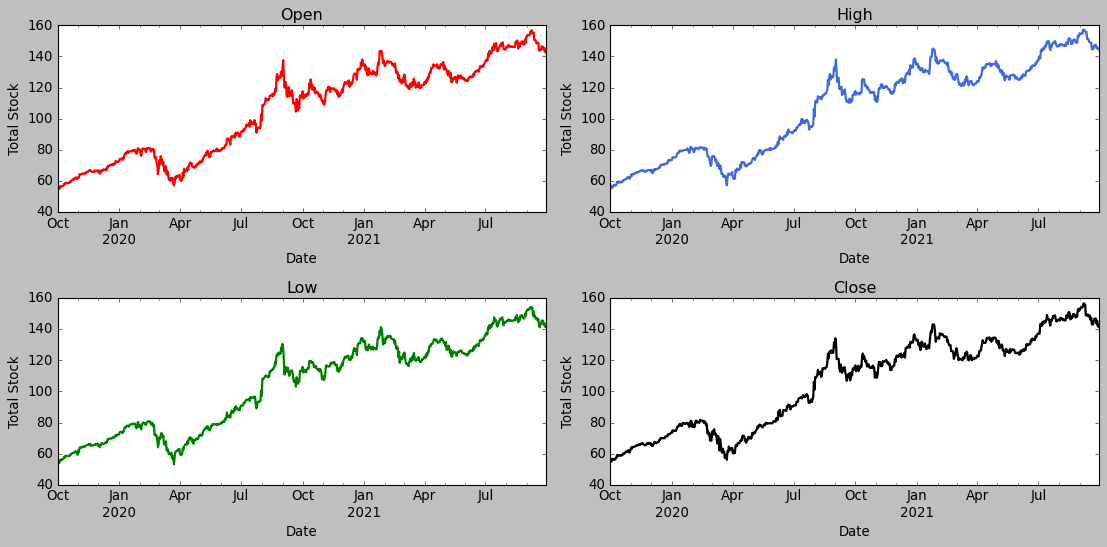

In [116]:
fig = plt.figure(figsize=(14,7))
column_names = ["Open", "High", "Low", "Close"]
column_colours = {"Open": "red", "High": "royalblue", "Low": "green", "Close": "black"}
i=0
for column_name in column_names:
    axc = fig.add_subplot(2, 2, i+1)
    ax = df_companies["Apple"][column_name].plot(ax=axc, legend=False, lw=2, color = column_colours[column_name])
    ax.set_title(column_name)
    ax.set_ylabel("Total Stock") 
    plt.style.use('classic')
    i+=1
    fig.tight_layout()

The daily open, high, low and close plots for our Apple stocks. We see that these graphs are very similar and show very minute differences. High stocks are obviously the greatest and low the least, but open and close stocks are very much similar and do not differentiate much over a daily analysis of our stocks. We see for our stocks that there is a large enough crash from the start of March 2020 to April 2020. This is likely due to the Covid-19 initial out break and the mass hysteria that followed. Following this crash, however we see that our stocks began rising massively over the next year as people began to reinvest. Shockingly, stocks are much higher than they had ever been despite or possibly due to the crash caused by Covid. 

#### Daily Highs vs Lows

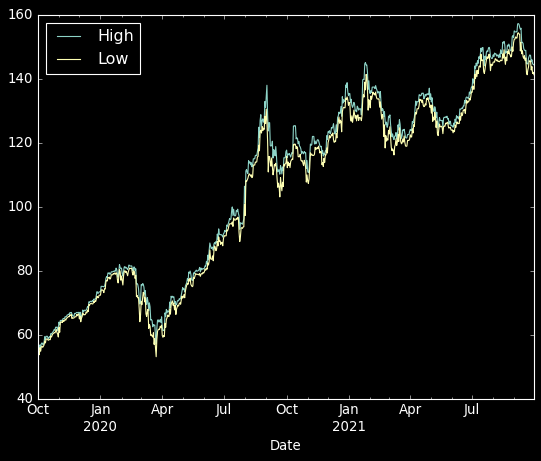

In [8]:
daily_highs_max = df_companies["Apple"]["High"].resample('D').max()
daily_lows_min = df_companies["Apple"]["Low"].resample('D').min()
daily_highs_max.plot(legend=True)
daily_lows_min.plot(legend=True)
plt.style.use('dark_background')

Plotting daily highs and lows together we can see the difference in the amounts by day despite how minimal this is. However, as we analyse monthly highs vs. monthly lows, we'll start to see more of a difference between our plots

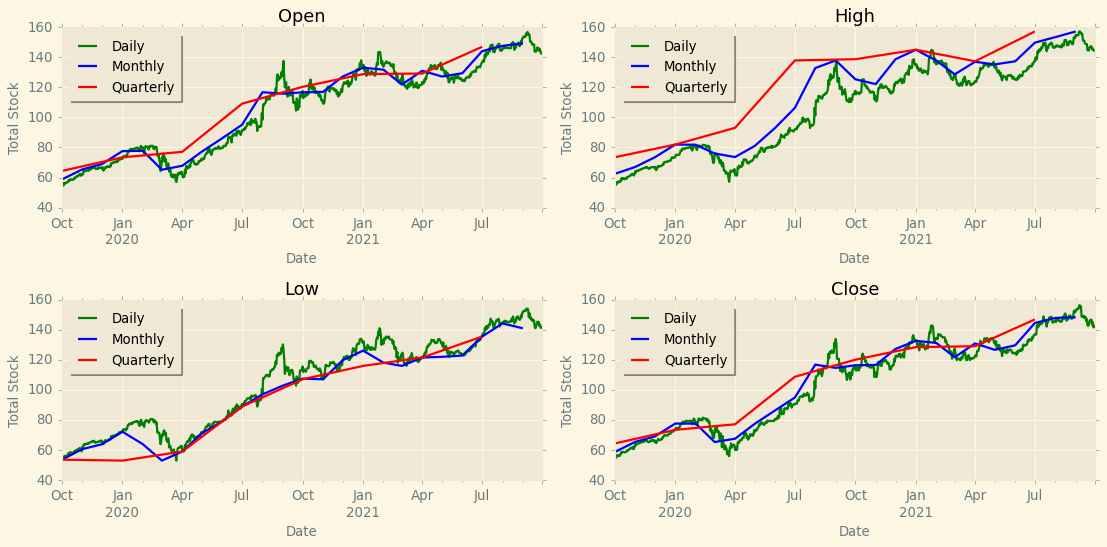

In [211]:
fig = plt.figure(figsize=(14,7))
freq_codes = ['D', 'M', 'Q']
column_names = ["Open", "High", "Low", "Close"]
freq_colours = {'D':'green', 'M':'blue', 'Q':'red'}
abbr = {'D':'Daily', 'M':'Monthly', 'Q':'Quarterly'}
i=0
for name in column_names:
    axc1 = fig.add_subplot(2, 2, i+1)
    i+=1
    for code in freq_codes:
        if name == "Open":
            highs_max = df_companies["Apple"][name].resample(code).mean()
        elif name == "Close":
            highs_max = df_companies["Apple"][name].resample(code).mean()
        if name == "High":
            highs_max = df_companies["Apple"][name].resample(code).max() 
        if name == "Low":
            highs_max = df_companies["Apple"][name].resample(code).min()
        
        ax = highs_max.plot(ax=axc1, legend=False, lw=2, color = freq_colours[code], label=abbr[code])
        ax.set_title(name)
        plt.legend(loc='upper left', shadow=True, prop={'size': 12})
        plt.style.use('Solarize_Light2')
        ax.set_ylabel("Total Stock")
        fig.tight_layout()

We see from our graphs above that as we go from daily, to monthly, to quarterly plots of our stocks, our plots gradually become much smoother and less noisy/erratic. 

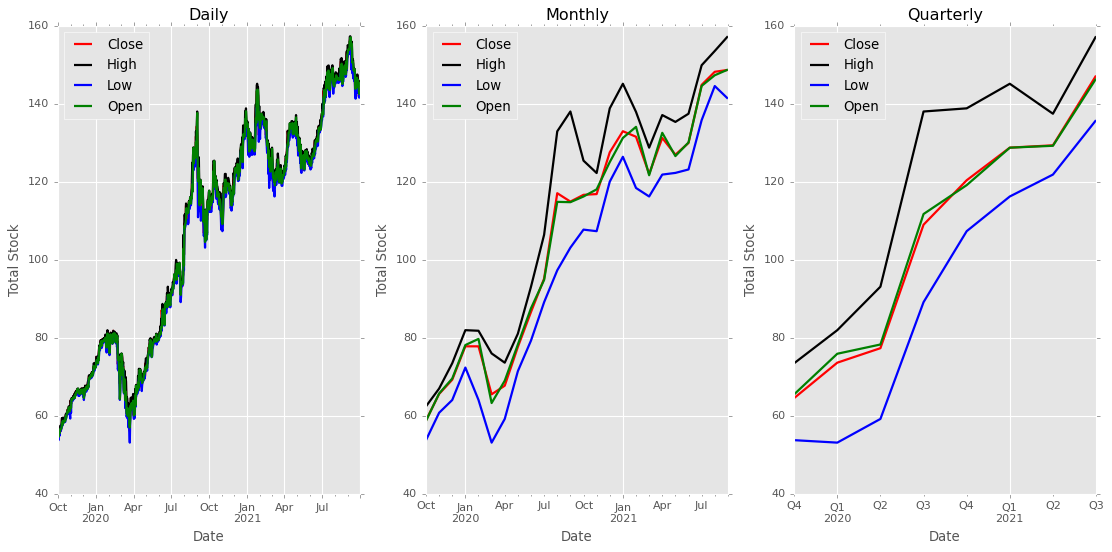

In [25]:
fig = plt.figure(figsize=(14,7))
freq_codes = ['D', 'M', 'Q']
freq_names = {"D": "Daily", "M": "Monthly", "Q": "Quarterly"}
column_colours = {"Open":"green", "High":"black", "Low":"blue", "Close":"red"}
i=0
for code in freq_codes:
    axc1 = fig.add_subplot(1, 3, i+1)
    highs_max = df_companies["Apple"].resample(code).agg({'Close': 'mean','High': 'max','Low': 'min','Open': 'median'})
    ax = highs_max.plot(ax=axc1, legend=True, lw=2, color = column_colours)
    ax.set_title(freq_names[code])
    plt.style.use('ggplot')
    ax.set_ylabel("Total Stock")
    fig.tight_layout()
    i+=1

At Daily levels, it's hard to differentiate between levels of stocks but as we increase to monthly and quarterly, our graphs begin to smooth and we see a clear difference in our stock levels. We get the mean values of our open stocks whereas we get the mean of our close stocks in order to actual see the line plots as if they were both averages, there was little to no differnce in amounts. 

## Facebook Stocks

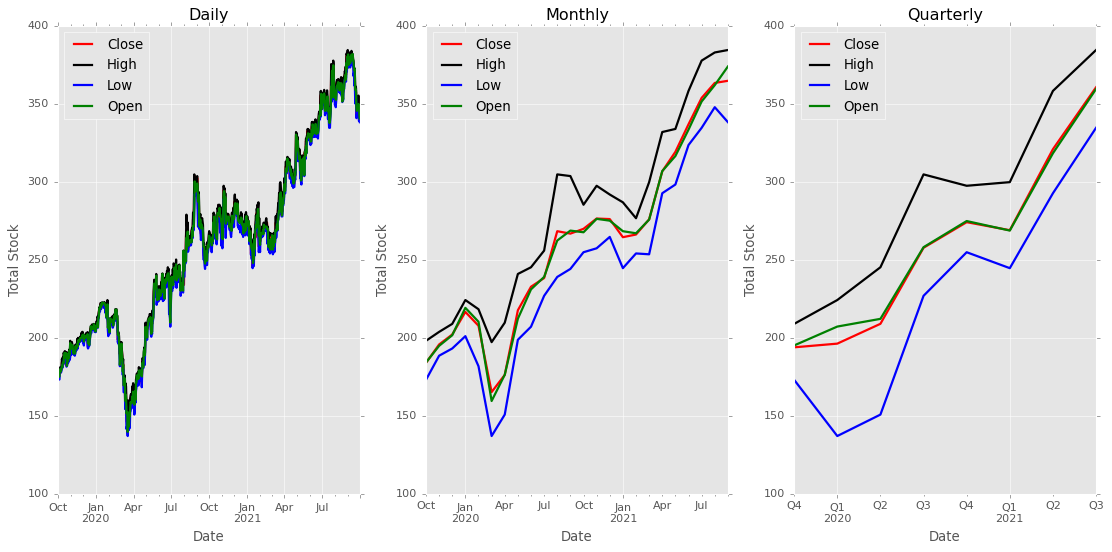

In [101]:
fig = plt.figure(figsize=(14,7))
freq_codes = ['D', 'M', 'Q']
freq_names = {"D": "Daily", "M": "Monthly", "Q": "Quarterly"}
column_colours = {"Open":"green", "High":"black", "Low":"blue", "Close":"red"}
i=0
for code in freq_codes:
    axc1 = fig.add_subplot(1, 3, i+1)
    highs_max = df_companies["Facebook"].resample(code).agg({'Close': 'mean','High': 'max','Low': 'min','Open': 'median'})
    ax = highs_max.plot(ax=axc1, legend=True, lw=2, color = column_colours)
    ax.set_title(freq_names[code])
    plt.style.use('ggplot')
    ax.set_ylabel("Total Stock")
    fig.tight_layout()
    i+=1

### Moving Averages/Rolling Means for Facebook Stocks

<AxesSubplot:xlabel='Date'>

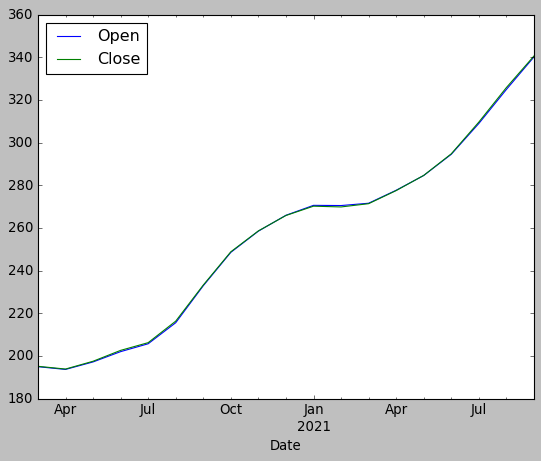

In [95]:
groups = df_companies["Facebook"].groupby(pd.Grouper(freq='M'))
df3 = groups.agg({'Open':'mean', 'Close':'mean'})
rm6 = df3.rolling(6).mean()
rm6 = rm6.loc["2020-03-31":]
rm6.plot()

We see that when plotting averages for a 6 month window for Open and Closing Stocks, The plot lines for open and close are almost indistinguishable. To prevent this, we will use median to get an average for Open stocks and we will use mean to get an average for Close Stocks. We'll also compare daily, monthly and quarterly moving averages across our whole data set rather than just a 6 month window like above. 

In [94]:
dff = df_companies["Facebook"]
rawo = dff["Open"]
rawc = dff["Close"]
rawo.name = "Open Daily (Raw) Data"
rawc.name = "Close Daily (Raw) Data"
# compute the 1 month rolling average
rmo3 = rawo.rolling(31).median()    
rmo3.name = "Open Monthly average"
rmc3 = rawc.rolling(31).mean()
rmc3.name = "Close Monthly Average"
# compute the 3 month (quarterly) rolling average
rmo6 = rawo.rolling(91).median()
rmo6.name = "Open Quarterly Average"
rmc6 = rawc.rolling(91).mean()
rmc6.name = "Close Quarterly Average"
# merge the series to create a new Data Frame
dfb = pd.concat([rawo, rawc, rmo3, rmc3, rmo6, rmc6], axis=1)
dfb.tail()

,Open Daily (Raw) Data,Close Daily (Raw) Data,Open Monthly average,Close Monthly Average,Open Quarterly Average,Close Quarterly Average
Date,,,,,,
2021-09-26,348.89,347.115,375.88,369.299355,359.44,360.931978
2021-09-27,349.81,353.580,375.88,368.684839,359.44,360.909341
2021-09-28,347.97,340.650,375.88,367.786290,359.44,360.785824
2021-09-29,343.15,339.610,374.75,366.462097,359.44,360.696813
2021-09-30,340.45,339.390,374.75,365.130806,359.44,360.531978


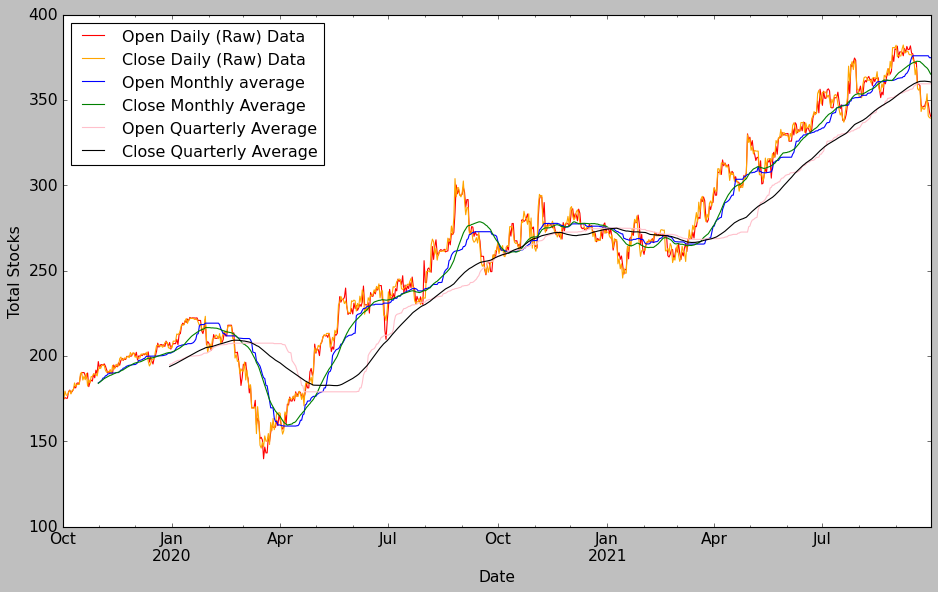

In [117]:
ax = dfb.plot(figsize=(14, 8), fontsize=14, color=["red","orange", "blue", "green", "pink", "black"])
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Total Stocks", fontsize=14);

We see once again that as we go from daily to monthly to quarterly averages, our graph becomes much smoother. Our daily/raw data is much more erratic and contains the peaks and also the troughs of the overall graph which is to be expected. 

**Plot the daily frequencies of high stocks for four arbitrary months**

<AxesSubplot:title={'center':'Facebook High Stocks for Four Arbitrary months'}, xlabel='Date'>

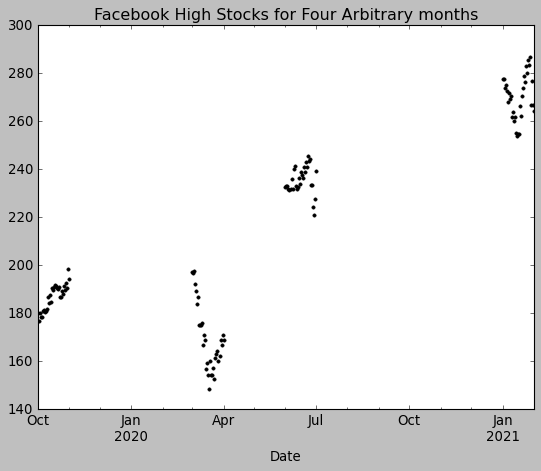

In [99]:
month1 = df_companies["Facebook"]['2019-10-1':'2019-11-1']["High"].resample('D').max()
month2 = df_companies["Facebook"]['2020-03-1':'2020-04-1']["High"].resample('D').max()
month3 = df_companies["Facebook"]['2020-06-1':'2020-07-1']["High"].resample('D').max()
month4 = df_companies["Facebook"]['2021-01-1':'2021-02-1']["High"].resample('D').max()
plt.style.use('classic')
plt.title("Facebook High Stocks for Four Arbitrary months")
month1.plot(style='k.')
month2.plot(style='k.')
month3.plot(style='k.')
month4.plot(style='k.')

This graph is very interesting as we see that there is a huge crash in Facebook stocks in March due to Covid 19, but the stocks begin to recover by the end of the month and we see that by July stocks have risen much higher than they ever were before Covid hit. Due to this discovery, we will look further into march 2020 for our other stocks and also the resulting rise caused by the intial crash. 

## Microsoft Stocks 

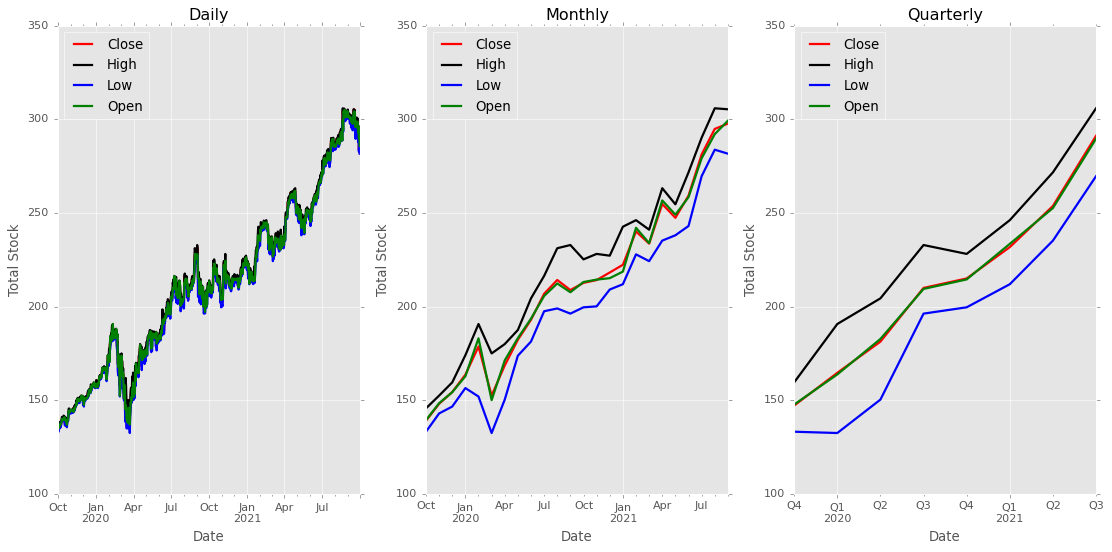

In [102]:
fig = plt.figure(figsize=(14,7))
freq_codes = ['D', 'M', 'Q']
freq_names = {"D": "Daily", "M": "Monthly", "Q": "Quarterly"}
column_colours = {"Open":"green", "High":"black", "Low":"blue", "Close":"red"}
i=0
for code in freq_codes:
    axc1 = fig.add_subplot(1, 3, i+1)
    highs_max = df_companies["Microsoft Corporation"].resample(code).agg({'Close': 'mean','High': 'max','Low': 'min','Open': 'median'})
    ax = highs_max.plot(ax=axc1, legend=True, lw=2, color = column_colours)
    ax.set_title(freq_names[code])
    plt.style.use('ggplot')
    ax.set_ylabel("Total Stock")
    fig.tight_layout()
    i+=1

**Let's plot the daily, monthly and quarterly frequencies for Microsoft stocks in 2020 and 2021**

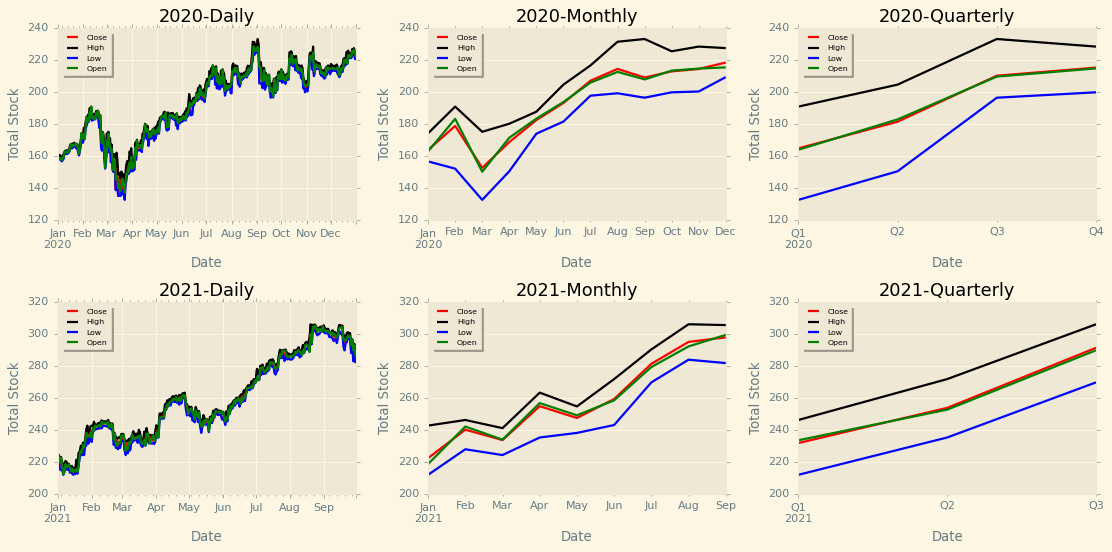

In [125]:
fig = plt.figure(figsize=(14,7))
freq_codes = ['D', 'M', 'Q']
freq_names = {"D": "Daily", "M": "Monthly", "Q": "Quarterly"}
column_colours = {"Open":"green", "High":"black", "Low":"blue", "Close":"red"}
i=0
years = ['2020', '2021']
for year in years:
    for code in freq_codes:
        axc1 = fig.add_subplot(2, 3, i+1)
        highs_max = df_companies["Microsoft Corporation"].loc[year].resample(code).agg({'Close': 'mean','High': 'max','Low': 'min','Open': 'median'})
        ax = highs_max.plot(ax=axc1, legend=True, lw=2, color = column_colours)
        ax.set_title(year + "-" + freq_names[code])
        plt.style.use('Solarize_Light2')
        plt.legend(loc='upper left', shadow=True, prop={'size': 7})
        ax.set_ylabel("Total Stock")
        fig.tight_layout()
        i+=1

We encounter an error for our 2019 quarterly graph as there is only 3 months worth of stock information from 2019 which would equate to only one quarter. We also see that 2021 only contains 3 quarters as we only have stock information up to September. From looking at our graphs, we see that our stocks seem to be on a constant incline every year with the only hit taken being during March 2020 (mind you this was a serious drop in stocks) but since March 2020 stocks began rising at an even faster rate. 

#### Analysing Average of Stocks by year and month name using bar charts

In [108]:
df_year = df_companies["Microsoft Corporation"].groupby(df_companies["Microsoft Corporation"].index.year).mean()
df_year

,Open,High,Low,Close
Date,,,,
2019,147.204837,148.004130,146.313478,147.176848
2020,192.722077,195.250287,190.208265,192.837964
2021,258.882747,260.994487,256.860220,259.088443


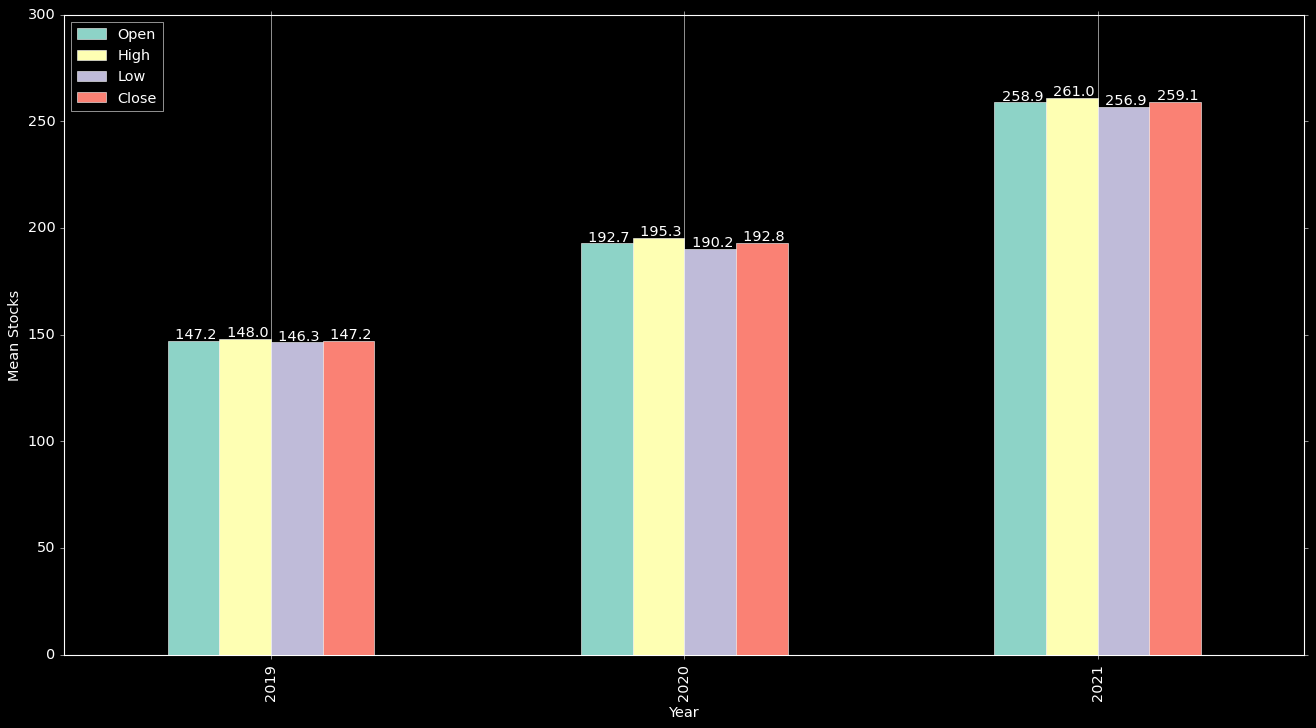

In [110]:
p1 = df_year.plot(kind='bar',figsize=(20, 10), fontsize=13, zorder=3)
p1.set_xlabel("Year",fontsize=13)
p1.set_ylabel("Mean Stocks",fontsize=13)
p1.legend(fontsize=13, loc='upper left')
plt.style.use("dark_background")
p1.yaxis.grid();
for p in p1.patches:
    b = p.get_bbox()
    val = "     {:0.1f}".format(b.y1 + b.y0)        
    p1.annotate(val, ((b.x0 + b.x1)/2 + -0.1, b.y1 + 1.0), fontsize=13)

This chart gives us great insight into the rise of stocks each year. We see that stocks have been getting higher on average over the past 3 years with stocks growing even more from 2020 to 2021 despite the outbreak of Covid-19 crashing the stock market. This bar chart also gives us more of an insight into opening and closing stock differences. We see for 2019 there is no difference in the average of opening and closing stocks, however for 2020 and 2021 we see that closing stocks are slightly higher on average. This might suggest that stocks rise throughout the day and are higher at night than in the morning. 

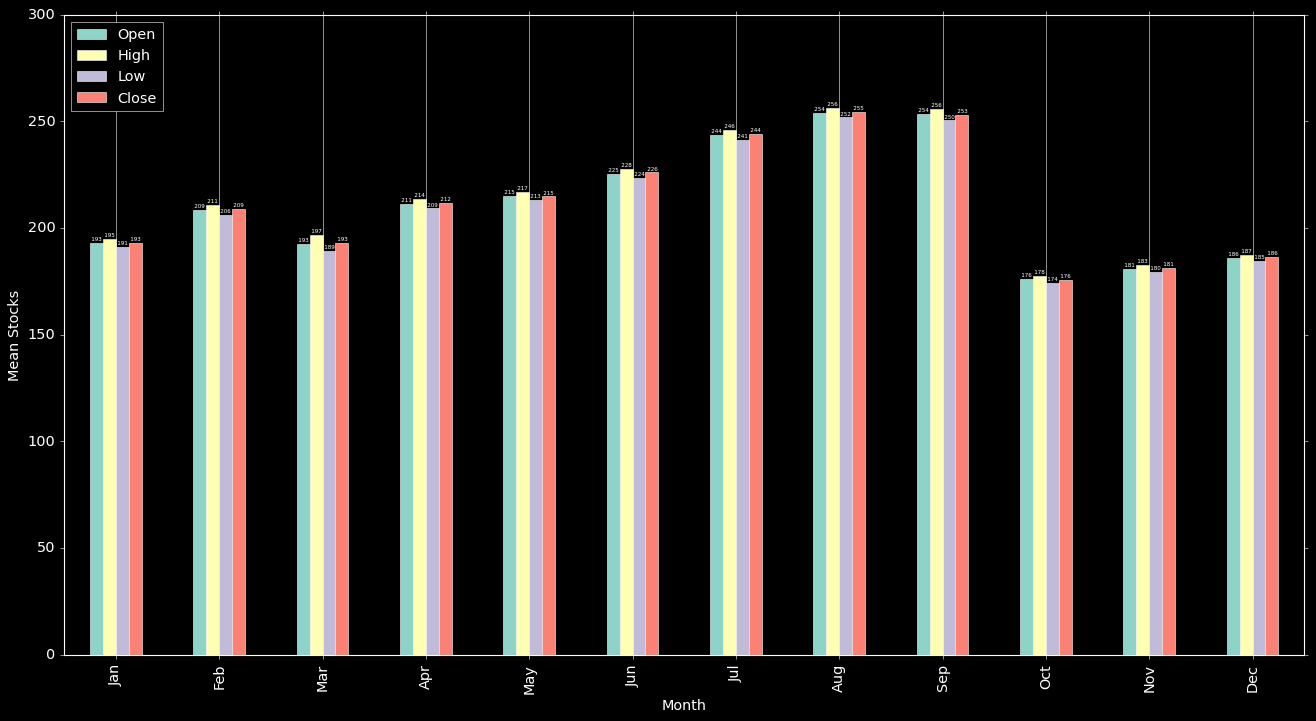

In [111]:
df_month = df_companies["Microsoft Corporation"].groupby(df_companies["Microsoft Corporation"].index.month).mean()
df_month = df_month.reset_index()
df_month['Date'] = df_month['Date'].apply(lambda x: calendar.month_abbr[x])
df_month = df_month.set_index('Date')
p1 = df_month.plot(kind='bar',figsize=(20, 10), fontsize=13, zorder=3)
p1.set_xlabel("Month",fontsize=13)
p1.set_ylabel("Mean Stocks",fontsize=13)
p1.legend(fontsize=13, loc='upper left')
plt.style.use("dark_background")
p1.yaxis.grid();
for p in p1.patches:
    b = p.get_bbox()
    val = "   {:.0f}".format(b.y1 + b.y0)        
    p1.annotate(val, ((b.x0 + b.x1)/2 + -0.1, b.y1 + 1.0), fontsize=5)

This graph gives us more of an insight into stock levels at different months of the year. The problem with analysing this however, is that we don't have three full years to analyse as 2020 is the only year we have with stock values for all 12 months.

## Intel Stocks

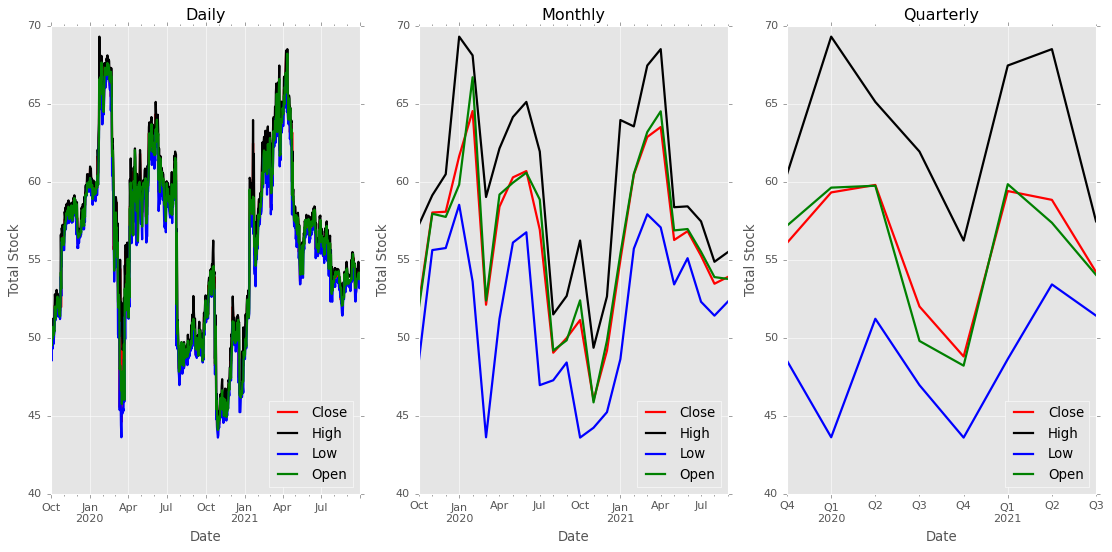

In [119]:
fig = plt.figure(figsize=(14,7))
freq_codes = ['D', 'M', 'Q']
freq_names = {"D": "Daily", "M": "Monthly", "Q": "Quarterly"}
column_colours = {"Open":"green", "High":"black", "Low":"blue", "Close":"red"}
i=0
for code in freq_codes:
    axc1 = fig.add_subplot(1, 3, i+1)
    highs_max = df_companies["Intel Corporation"].resample(code).agg({'Close': 'mean','High': 'max','Low': 'min','Open': 'median'})
    ax = highs_max.plot(ax=axc1, legend=True, lw=2, color = column_colours)
    ax.set_title(freq_names[code])
    plt.style.use('ggplot')
    ax.set_ylabel("Total Stock")
    fig.tight_layout()
    i+=1

We see that for Intel Stocks, things are much different. There is much more fluctuation in stocks at many different periods. The stock levels are very erratic and you see that even when we look at quarterly frequencies for the stocks, although they are smoother, they are still prone to large inclines and declines. This company's stocks are much different to that of the bigger companies as although their stocks take a big hit in March 2020 and then increase in the following months, they take another massive hit in July and get so low that in October of 2020, stocks actually reach a lower point than in March with the Covid 19 crash.

### Intel Corporation March 2020 vs July 2020 vs October 2020 Stock Crash

Text(0.5, 1.0, 'Chip Delay/3rd Quarter Reports Crash')

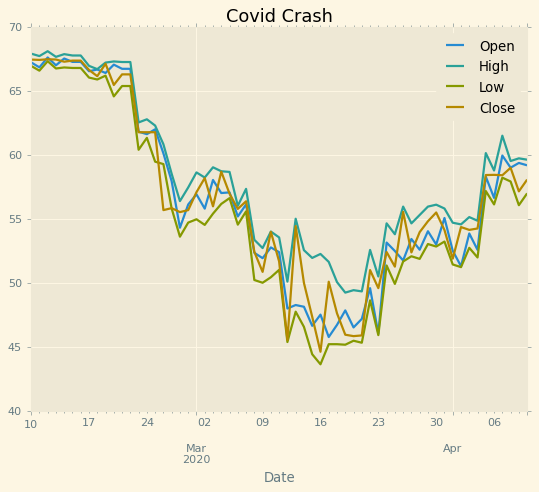

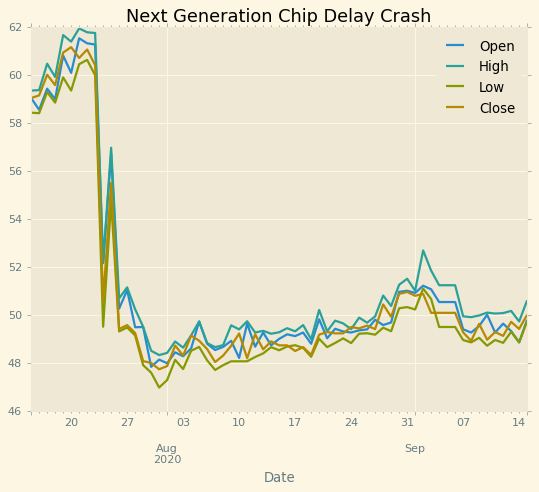

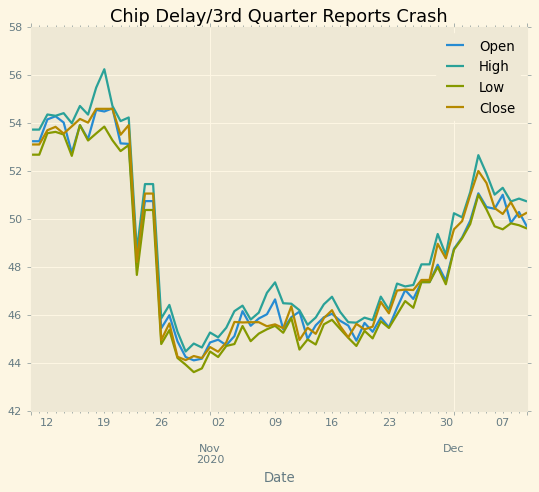

In [151]:
month1 = df_companies["Intel Corporation"]['2020-02-10':'2020-04-10'].plot()
month1.set_title('Covid Crash')
month2 = df_companies["Intel Corporation"]['2020-07-15':'2020-09-15'].plot()
month2.set_title('Next Generation Chip Delay Crash')
month3 = df_companies["Intel Corporation"]['2020-10-10':'2020-12-10'].plot()
month3.set_title('Chip Delay/3rd Quarter Reports Crash')

We see that Intel went through three massive stock market crashes in 2020. The first crash was due to Covid 19. Although stock prices fell dramatically, they soon began to rise again over the next few months until another massive crash in July. This was due to the announcement of a six month delay in the release of its new next generation chips. Unlike the Covid crash, stocks failed to rise over the next few months and took another hit in October when the third quarter reports for the company emerged and investors became even more fearful. Stocks have risen since, but Intel's stocks really show us the unpredictability of the stock market.  

Text(0.5, 1.0, '2020 Box Plot')

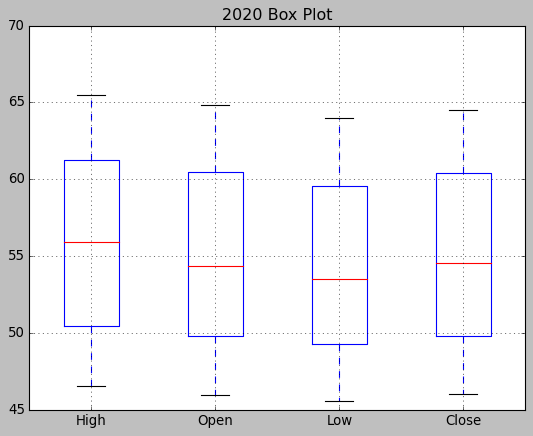

In [202]:
one_year = df_companies["Intel Corporation"].loc['2020'].resample('M').mean()
boxplot = one_year.boxplot(column = ['High', 'Open', 'Low', 'Close'])
boxplot.set_title("2020 Box Plot")





# Comparison of Time Series

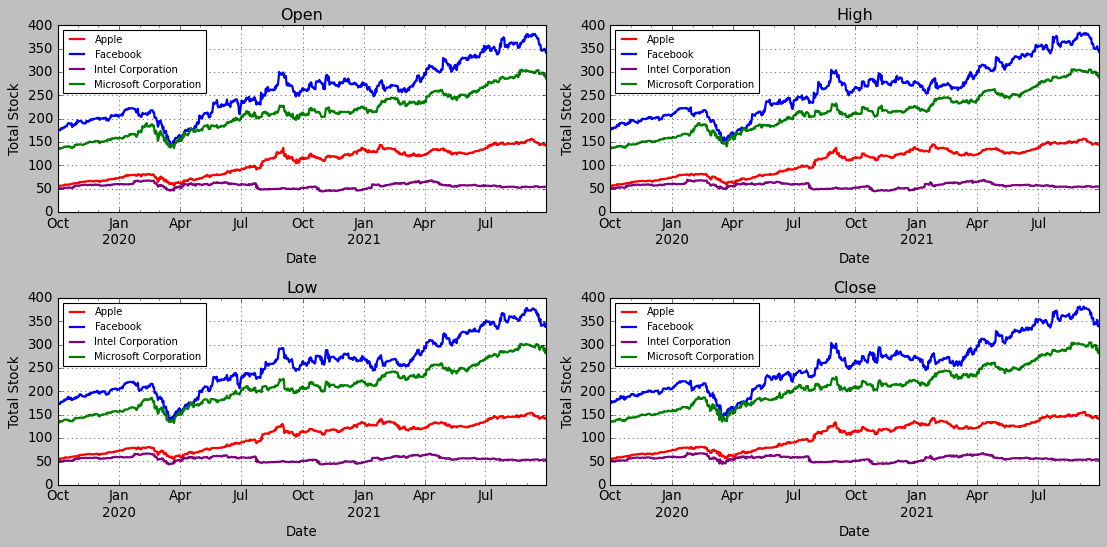

In [264]:
stock_colours = {"Apple":"red", "Facebook":"blue", "Microsoft Corporation":"green", "Intel Corporation":"purple"}
fig = plt.figure(figsize=(14,7))
column_names = ["Open", "High", "Low", "Close"]
df_stock_highs = pd.DataFrame(columns=["AAPL", "FB", "INTC" ,"MSFT"])
i=0
for column_name in column_names:
    axc = fig.add_subplot(2, 2, i+1)
    i+=1
    for stock_name in stock_names:
        ax = df_companies[stock_name][column_name].plot(ax=axc, legend=True, lw=2, label = stock_name, color = stock_colours)
        ax.set_title(column_name)
        ax.set_ylabel("Total Stock") 
        plt.style.use('classic')
        plt.grid()
        ax.legend(fontsize=9, loc='upper left')
        fig.tight_layout()

We clearly see that Facebook dominates with the highest stock prices, despite dropping drastically to Microsoft's level during the Covid crash of March 2020. Intel has the lowest stocks but was almost equal to Apple during the Covid stock crash, but has been drifting apart ever since. 

As regards the Covid Stock Market crash in 2020, all companies clearly saw a massive fall in stocks with Facebook suffering the most drastic reduction. The crashes for Apple and Intel don't look like they suffered much in this plot, due to the drastic decrease in Facebook stocks, but they actually dropped 20% in the space of a few weeks.

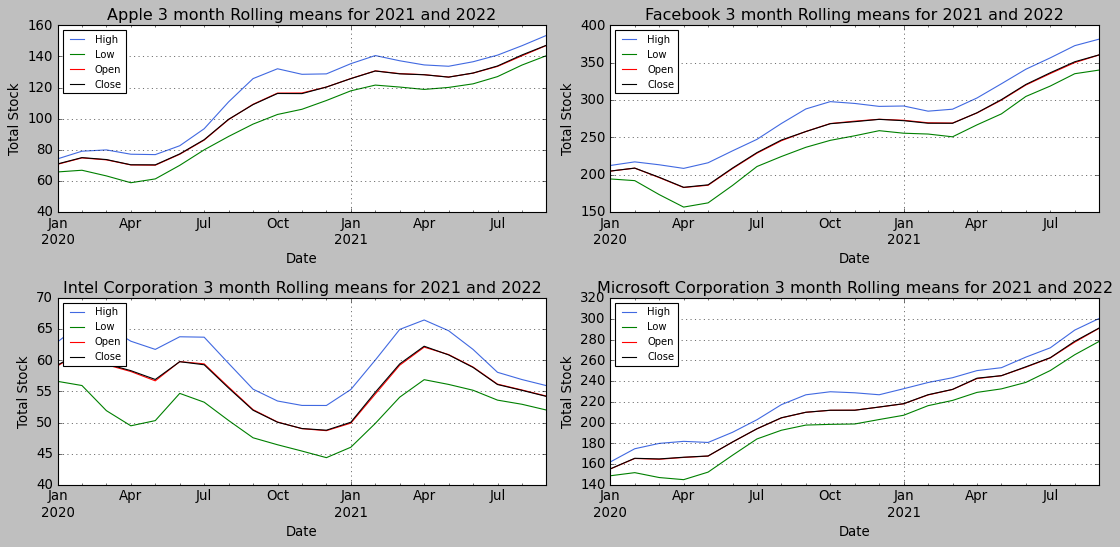

In [289]:
fig = plt.figure(figsize=(14,7))
i=0
for stock_name in stock_names:
    axc = fig.add_subplot(2, 2, i+1)
    groups = df_companies[stock_name].groupby(pd.Grouper(freq='M'))
    df3 = groups.agg({'High':'max', 'Low':'min', 'Open':'mean', 'Close':'mean'})
    rm3 = df3.rolling(3).mean()
    rm3 = rm3.loc["2020-01-01":]
    ax = rm3.plot(ax=axc, label=stock_name, color = column_colours)
    ax.set_title(stock_name + " 3 month Rolling means for 2021 and 2022")
    ax.set_ylabel("Total Stock") 
    plt.style.use('classic')
    plt.grid()
    ax.legend(fontsize=9, loc='upper left')
    fig.tight_layout()
    i+=1

We make our graph much less noisy by getting 3 month rolling means/moving averages for each of our time series. Each of are stocks are on a steady rise now aside from Intel which shows much more fluctuation. Apple seems to have gotten the greatest percentage increase in stocks following the March 2020 market crash

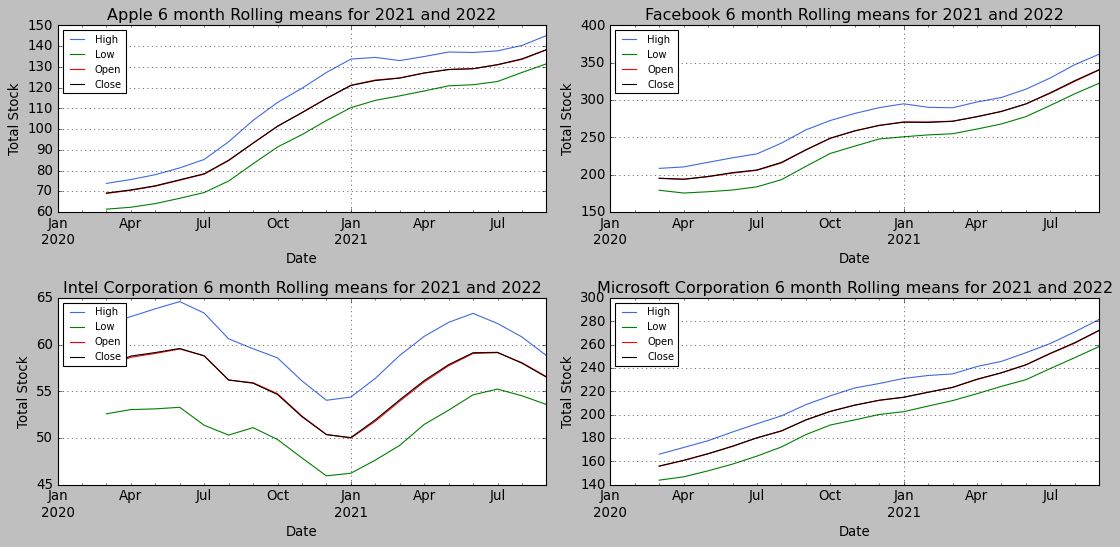

In [290]:
fig = plt.figure(figsize=(14,7))
i=0
for stock_name in stock_names:
    axc = fig.add_subplot(2, 2, i+1)
    groups = df_companies[stock_name].groupby(pd.Grouper(freq='M'))
    df6 = groups.agg({'High':'max', 'Low':'min', 'Open':'mean', 'Close':'mean'})
    rm6 = df6.rolling(6).mean()
    rm6 = rm6.loc["2020-01-01":]
    ax = rm6.plot(ax=axc, label=stock_name, color = column_colours)
    ax.set_title(stock_name + " 6 month Rolling means for 2021 and 2022")
    ax.set_ylabel("Total Stock") 
    plt.style.use('classic')
    plt.grid()
    ax.legend(fontsize=9, loc='upper left')
    fig.tight_layout()
    i+=1

We see that our graphs are missing the first 3 months as we can't get a 6 month rolling mean for January, February and March as there is less than 6 months of data before these months in 2019. Our graphs are very smooth for our bigger companies with a slight incline in each but one graph still shows big peaks and troughs for the Intel company as it saw some serious fluctuation in 2020 with some massive market crashes. 

## Analysing the 2020 Stock Market Crash for each of our four companies

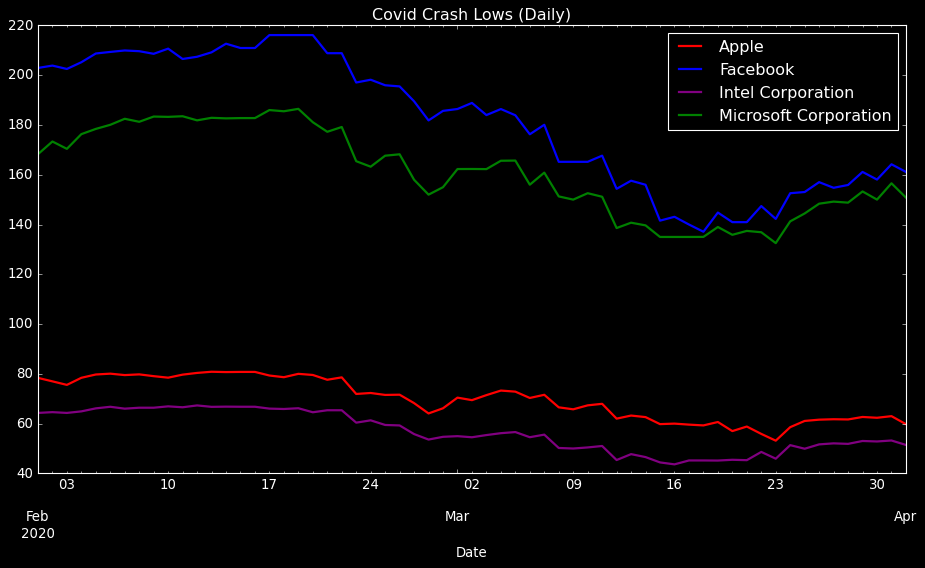

In [297]:
fig,axc = plt.subplots(figsize=(14,7))
i=0
for stock_name in stock_names:
    ax = df_companies[stock_name]["Low"]['2020-02-01':'2020-04-01'].plot(ax=axc, legend=True, lw=2, label = stock_name, color = stock_colours)
    ax.set_title('Covid Crash Lows (Daily)')
    plt.style.use("dark_background")
    i+=1

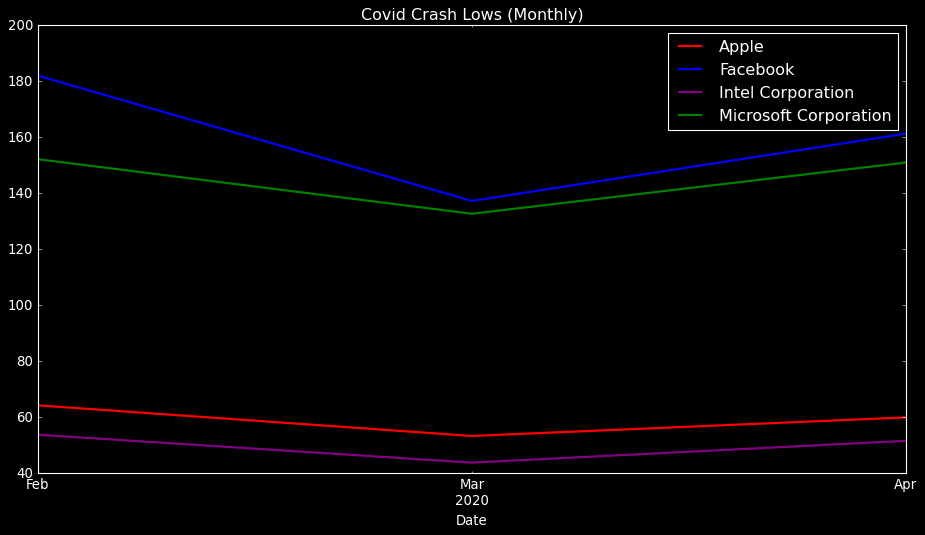

In [298]:
fig,axc = plt.subplots(figsize=(14,7))
i=0
for stock_name in stock_names:
    ax = df_companies[stock_name]["Low"]['2020-02-01':'2020-04-01'].resample('M').min().plot(ax=axc, legend=True, lw=2, label = stock_name, color = stock_colours)
    ax.set_title('Covid Crash Lows (Monthly)')
    plt.style.use("dark_background")
    i+=1

We smoothen our graph by getting monthly frequencies for the three month period rather than daily frequencies

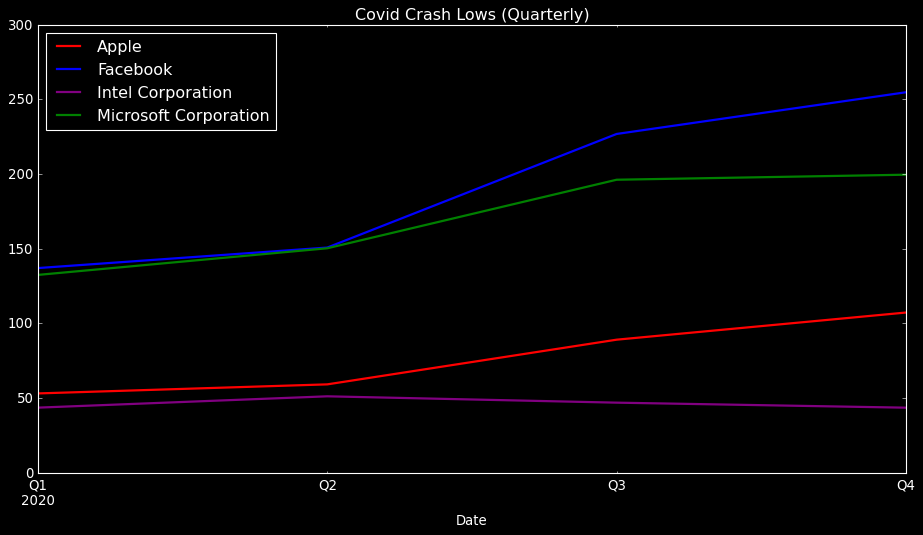

In [299]:
fig,axc = plt.subplots(figsize=(14,7))
i=0
for stock_name in stock_names:
    ax = df_companies[stock_name]["Low"]['2020-01-01':'2020-12-31'].resample('Q').min().plot(ax=axc, legend=True, lw=2, label = stock_name, color = stock_colours)
    ax.set_title('Covid Crash Lows (Quarterly)')
    plt.style.use("dark_background")
    i+=1

Our quarterly analysis of 2020 doesn't show much sign of a market crash. It looks more like the market is flattening in the First Quarter. Then in the second quarter we see a massive rise in stocks in all of our companies except for Intel where stocks actually fall. Our stocks continue to rise into the third and fourth quarter but Intel still contrasts the trend, with a steady decline in stock prices

# Conclusions

In this assignment we looked at the analysis of stock price data across four different companies, focusing particularly on daily, monthly and quarterly frequencies. As expected Microsoft, Facebook and Apple stocks all took on a similar trend however the Intel stock prices were very erratic especially in 2020. 

One particular difficulty with using the stock price data from these HTML pages was that it only covered a 24 month period from October 2019 to September 2021. This made it difficult to grasp whether stocks increased gradually every year or if stocks were higher/lower at different points in the year. The stocks also only contained week day (business day) information and there were also some null rows in each of the data sets. I replaced all these null values with estimates based on things like rolling means/moving averages. 

A number of differnt avenues could be considered for further analysis of this data:

- The analysis could be extended to a larger number of time series as although the four time series we analysed gave us good information, it would have been useful to see other stocks which followed different trends like Intel. 
- If further historic stock data was available, we could analyse monthly/quarterly trends in greater detail and see if our data was subject to seasonal fluctuation
- Also if there was further historic data we could possibly forecast future stocks based on the trends across decades